In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


In [2]:
ARQ_VENDAS = r'D:\#Mega\Jeferson - Dev\02 - Linguagens\Python\Analise_Producao_Geral\files\dados_vendas.csv'

In [3]:
df = pd.read_csv(ARQ_VENDAS)

In [4]:
df

,Data,Produto,Cliente,Quantidade_vendida,Preco_unitario,Valor_total
0,2022-01-01,Caneta Azul,Cliente Alfa,104,4.71,489.84
1,2022-01-01,Caneta Preta,Cliente Alfa,24,2.79,66.96
2,2022-01-01,Caneta Preta,Cliente Alfa,30,2.71,81.30
3,2022-01-01,Caneta Preta,Cliente Alfa,15,3.28,49.20
4,2022-01-01,Caneta Vermelha,Cliente Gama,55,3.18,174.90
...,...,...,...,...,...,...
13491,2024-12-30,Caneta Verde,Cliente Delta,55,2.64,145.20
13492,2024-12-30,Caneta Amarela,Cliente Épsilon,1,1.42,1.42
13493,2024-12-30,Caneta Amarela,Cliente Ômega,1,1.55,1.55
13494,2024-12-30,Caneta Amarela,Cliente Ômega,5,1.50,7.50


In [5]:
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

In [6]:
mes = 5
ano = 2024

In [7]:
df_filtrado = df[df['Data'].dt.year == ano]

In [8]:
meses_portugues = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}


In [14]:
df_filtrado

,Data,Produto,Cliente,Quantidade_vendida,Preco_unitario,Valor_total,Mes_abreviado
9001,2024-01-01,Caneta Azul,Cliente Alfa,52,4.08,212.16,Jan
9002,2024-01-01,Caneta Azul,Cliente Delta,51,4.62,235.62,Jan
9003,2024-01-01,Caneta Preta,Cliente Beta,22,2.71,59.62,Jan
9004,2024-01-01,Caneta Preta,Cliente Gama,19,2.91,55.29,Jan
9005,2024-01-01,Caneta Preta,Cliente Gama,33,3.08,101.64,Jan
...,...,...,...,...,...,...,...
13491,2024-12-30,Caneta Verde,Cliente Delta,55,2.64,145.20,Dez
13492,2024-12-30,Caneta Amarela,Cliente Épsilon,1,1.42,1.42,Dez
13493,2024-12-30,Caneta Amarela,Cliente Ômega,1,1.55,1.55,Dez
13494,2024-12-30,Caneta Amarela,Cliente Ômega,5,1.50,7.50,Dez


In [20]:
df_top_produtos = df_filtrado.groupby('Produto')['Valor_total'].sum().reset_index()
df_top_produtos = df_top_produtos.sort_values('Valor_total', ascending=True)

In [21]:
df_top_produtos

,Produto,Valor_total
0,Caneta Amarela,20199.26
3,Caneta Verde,46021.87
4,Caneta Vermelha,68739.94
2,Caneta Preta,82699.21
1,Caneta Azul,157889.21


In [10]:
df_filtrado['Mes_abreviado'] = df_filtrado['Data'].dt.month.map(meses_portugues)

C:\Users\mp_br\AppData\Local\Temp\ipykernel_6868\4195838422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Mes_abreviado'] = df_filtrado['Data'].dt.month.map(meses_portugues)


In [11]:
df_receita_mensal = df_filtrado.groupby('Mes_abreviado')['Valor_total'].sum().reset_index()

In [12]:
df_receita_mensal

,Mes_abreviado,Valor_total
0,Abr,37553.48
1,Ago,27452.96
2,Dez,29346.51
3,Fev,34123.43
4,Jan,34256.29
5,Jul,30744.83
6,Jun,31843.42
7,Mai,36533.66
8,Mar,37540.37
9,Nov,25652.76


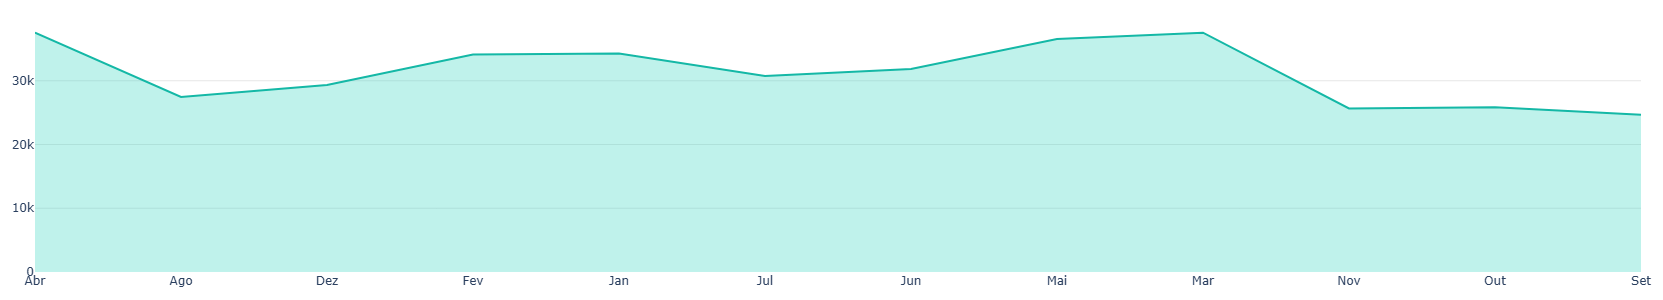

In [13]:
fig_receita = go.Figure()
fig_receita.add_trace(go.Scatter(
    x=df_receita_mensal['Mes_abreviado'],
    y=df_receita_mensal['Valor_total'],
    fill='tozeroy',
    fillcolor='rgba(45, 212, 191, 0.3)',
    line=dict(color='rgb(20, 184, 166)', width=2),
    mode='lines'   

    
))

fig_receita.update_layout(
    height=300,
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='rgba(128,128,128,0.2)'),
    hovermode='x unified'
)


#st.plotly_chart(fig_receita, use_container_width=True)